Import the necessary libraries

In [49]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

Gather Data

In [50]:
ticker_symbol="MSFT"
#Example: Mirosoft corporation

In [51]:
#fetching the historical data
start_period="2015-01-01"
end_period="2023-01-01"
historical_data = yf.download(ticker_symbol,start=start_period,end=end_period)


[*********************100%***********************]  1 of 1 completed


Data preparation

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(historical_data['Close'].values.reshape(-1, 1))

Prepare the data for LSTM


In [53]:
look_back_period = 30  # Number of previous time steps to consider
X, y = [], []
for i in range(len(scaled_prices) - look_back_period):
    X.append(scaled_prices[i:i + look_back_period, 0])
    y.append(scaled_prices[i + look_back_period, 0])

X, y = np.array(X), np.array(y)


In [54]:
# Reshape input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

Construct the LSTM Model


In [55]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Fit the Model

In [44]:
model.fit(X, y, epochs=100, batch_size=32)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0525
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0024
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0026
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0018
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0019
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0019
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0015
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0020
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0017
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0014
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - lo

 Predict Future Prices


In [45]:

future_data = yf.download(ticker_symbol, start=end_period, end="2024-06-01")
scaled_future_data = scaler.transform(future_data['Close'].values.reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed


In [46]:
# Prepare data for the prediction
test_data = scaled_future_data[-look_back_period:]
test_data = np.reshape(test_data, (1, look_back_period, 1))



Generate predictions


In [47]:
predicted_value = model.predict(test_data)
predicted_value = scaler.inverse_transform(predicted_value)

print("Forecasted price for June 1, 2024:", "${:.2f}".format(predicted_value[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Forecasted price for June 1, 2024: $409.72


Plot the results


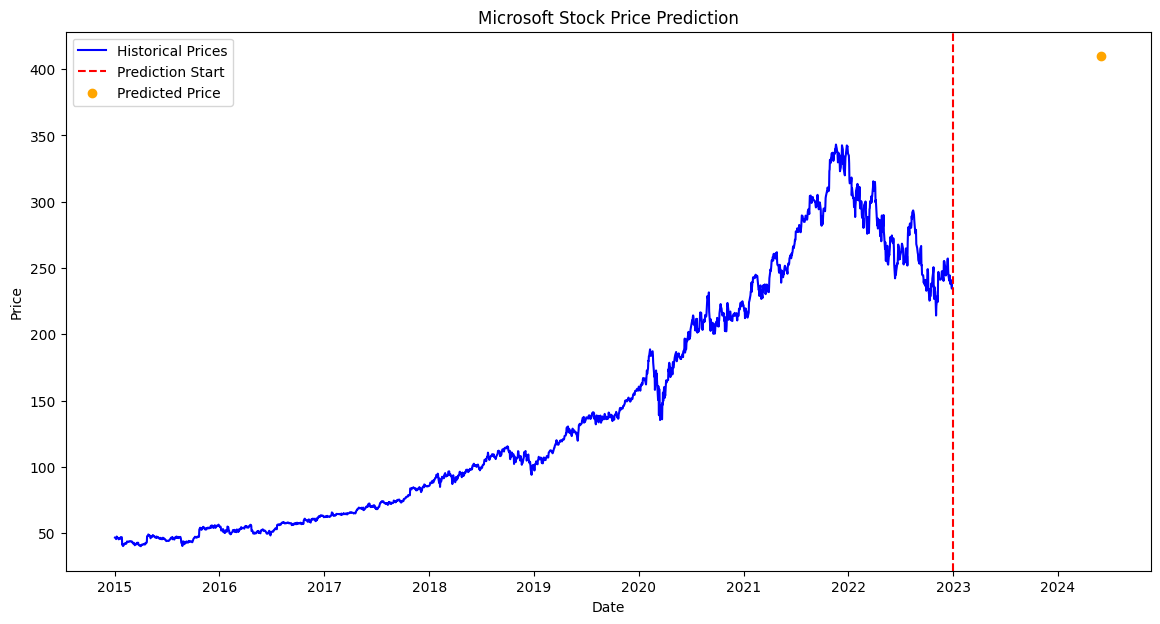

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(historical_data['Close'], label='Historical Prices', color='blue')
plt.axvline(x=pd.to_datetime(end_period), color='red', linestyle='--', label='Prediction Start')
plt.scatter(pd.to_datetime("2024-06-01"), predicted_value, color='orange', label='Predicted Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()